<a href="https://colab.research.google.com/github/KAMRANKHANALWI/Blockchain-AI/blob/main/RewardPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [5]:
df = pd.read_csv("training_data.csv")
print(df)

      timestamp  blockReward
0    1686640475     0.026833
1    1686640487     0.049940
2    1686640499     0.014670
3    1686640511     0.016400
4    1686640523     0.020162
..          ...          ...
395  1686645311     0.044205
396  1686645323     0.056086
397  1686645335     0.032964
398  1686645347     0.018590
399  1686645359     0.022593

[400 rows x 2 columns]


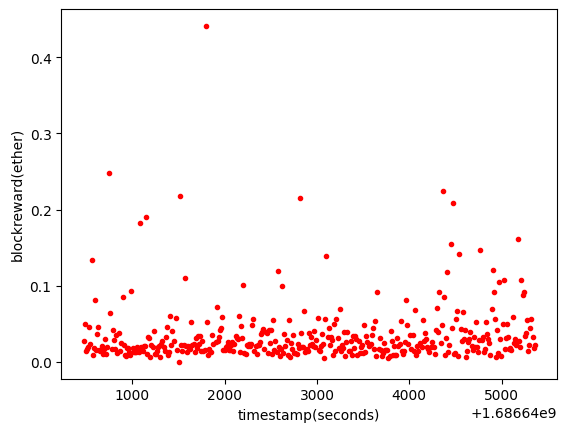

In [6]:
%matplotlib inline
plt.xlabel('timestamp(seconds)')
plt.ylabel('blockreward(ether)')
plt.scatter(df.timestamp, df.blockReward, color="red", marker=".")

In [7]:
model = RandomForestRegressor(n_estimators = 100, random_state=42)
model.fit(df.timestamp.values.reshape(-1,1), df.blockReward.values.ravel())

RandomForestRegressor(random_state=42)

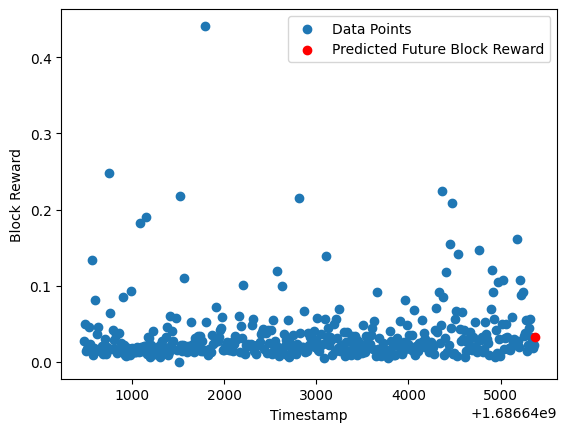

Predicted block reward:  0.03218302767192087


In [8]:
new_timestamp = np.array([[1686645371]])
predicted_blockReward = model.predict(new_timestamp)

plt.scatter(df.timestamp, df.blockReward, label="Data Points")
plt.scatter(new_timestamp, predicted_blockReward, label="Predicted Future Block Reward", color="red")
plt.xlabel('Timestamp')
plt.ylabel('Block Reward')
plt.legend()
plt.show()

print("Predicted block reward: ", predicted_blockReward[0])

In [9]:
# Make predictions on the training data
predicted_blockReward_train = model.predict(df.timestamp.values.reshape(-1,1))

In [10]:
# Calculate evaluation metrics
mae = mean_absolute_error(df.blockReward, predicted_blockReward_train)
mse = mean_squared_error(df.blockReward, predicted_blockReward_train)
rmse = np.sqrt(mse)
r2 = r2_score(df.blockReward, predicted_blockReward_train)

In [11]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.021755457657578258
Mean Squared Error (MSE): 0.0014741746854604698
Root Mean Squared Error (RMSE): 0.03839498255580369
R-squared (R²) Score: 0.09540643866408138


In [12]:
# Save the trained model to a file
joblib.dump(model, 'random_forest_regressor_model.pkl')

['random_forest_regressor_model.pkl']